## Get some images and import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import os
from skimage import data, io, filters
from skimage.morphology import opening
from skimage import filters
from skimage import transform
from skimage.filters import threshold_otsu

from skimage import morphology


# Imaging Processing: 
## Loading Images, Grayscaling, Customizing Masks from Images, Cropping all Images

In [2]:

file_data = '../data/example_ground_truth.csv'
path_image = '../data/example_image'
path_mask = '../data/example_segmentation'

file_features = '../features/features.csv'

df = pd.read_csv(file_data)


image_id = list(df['image_id'])




In [3]:

image_list = [] 
custom_seg_list = []

image_colour = 50

# STEP 1: Read and Grayscale images
for image_colour in range(50,55):
    # reads the image
    img = cv2.imread(path_image + os.sep + image_id[image_colour] + '.jpg')
    image_colour +=1
    # calls the function for grayscaling images
    gray_image = rgb2gray(img)

    thresh = threshold_otsu(gray_image)
    binary = (gray_image < thresh)

    # appends grayscaled images to list
    image_list.append(binary)


NameError: name 'rgb2gray' is not defined

In [ ]:
# STEP 2: Customize masks for all gray images
# take all gray images, turn them into binary images by threshold
# append new segmentation images into list
for image_gray in range(5):
    
    # Erosion will get rid of hairs but also make the lesion smaller. 
    # Dilation will restore the lesion (but not the hairs)

    # There is some noise, we can get rid of it by morphological operators
    #Structural element, that we will use as a "brush" on our mask
    struct_el = morphology.disk(20)

    #mask_eroded = morphology.binary_erosion(mask, struct_el)

    opened = opening(image_list[image_gray],struct_el)
    img_crop = crop_image(opened)
 
    # Gaussian filtering (blur)
    blurred_mask = filters.gaussian(img_crop,sigma=5) 

    # Rotate mask
    custom_seg_list.append(blurred_mask)

In [4]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]



In [5]:
# STEP 3: Save all customized segmentation mask by image_id 



for img in range():
    #img_crop = crop_image(custom_seg_list[img])
    plt.imshow(custom_seg_list[img], cmap='gray')
    #plt.imshow(custom_seg_list[img], cmap="gray")
    plt.savefig(path_processed + os.sep + image_id[img] + "_customized.png")


TypeError: range expected at least 1 argument, got 0

In [6]:
# Threshold: for customizing our own masks for each image
def threshold_mask(mask):
    custom_mask = mask < 120 #from plt.hist function
    return custom_mask



In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [8]:
#custom_seg_list = np.array(custom_seg_list)


***

### READING IN FILE: EXAMPLE_GROUND_TRUTH.CSV

In [9]:

#read file
file_input = pd.read_csv("../data/example_ground_truth.csv")
file_input.shape

#150 images in total
#3 columns: image_id, melanoma, keratosis

file_input

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0
...,...,...,...
145,ISIC_0015443,0.0,0.0
146,ISIC_0015445,0.0,0.0
147,ISIC_0015483,0.0,0.0
148,ISIC_0015496,0.0,0.0


***

### DATA FRAME FOR IMAGES WITH NO DIAGNOSIS, MEANING MELANOMA AND KERATOSIS == 0.0

In [10]:
# data frame for images with no diagnosis
non_malignant_df = file_input.loc[(file_input['melanoma'] == 0.0) & (file_input["seborrheic_keratosis"] == 0.0)]
non_malignant_df


,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0
...,...,...,...
145,ISIC_0015443,0.0,0.0
146,ISIC_0015445,0.0,0.0
147,ISIC_0015483,0.0,0.0
148,ISIC_0015496,0.0,0.0


## DATA FRAME FOR IMAGES WITH MELANOMA

In [11]:
#filter out all images that are not melanoma
melanoma = file_input[file_input["melanoma"] == 1.0]

#remove column for keratosis
melanoma_df = melanoma.drop(["seborrheic_keratosis"], axis = 1)
#number of images left
melanoma.shape
melanoma_df

,image_id,melanoma
25,ISIC_0012099,1.0
30,ISIC_0012151,1.0
42,ISIC_0012288,1.0
51,ISIC_0012434,1.0
73,ISIC_0013232,1.0
75,ISIC_0013491,1.0
76,ISIC_0013501,1.0
77,ISIC_0013518,1.0
79,ISIC_0013549,1.0
84,ISIC_0013644,1.0


### READING IN FILE FOR FEATURES.CSV

In [12]:
#read file features
file_features_df = pd.read_csv("../features/features.csv")
# file_features_df.shape
# 150 rows, 3 columns

#data frame for features
file_features_df 

,image_id,area,perimeter
0,ISIC_0001769,216160.0,2013.0
1,ISIC_0001852,130493.0,1372.0
2,ISIC_0001871,205116.0,1720.0
3,ISIC_0003462,161705.0,1344.0
4,ISIC_0003539,317040.0,2063.0
...,...,...,...
145,ISIC_0015443,9732988.0,13775.0
146,ISIC_0015445,12049938.0,19517.0
147,ISIC_0015483,8856478.0,13813.0
148,ISIC_0015496,8951522.0,13742.0


### Merge data frame for features with data frame for melanoma to filter out non-related images

In [13]:
#rename column 'id' to 'image_id'
file_features_df.rename(columns={'id': 'image_id'}, inplace=True)

#merge data frame for file_features_df with melanoma by column 'image_id'
merge_feature_melanoma = file_features_df.merge(melanoma_df, on='image_id', how='right')

#data frame for merged features and melanoma
#this data frame shows only data related to melanoma 

merge_feature_melanoma 

# size of data frame
# merge_feature_melanoma.shape
# (30, 4)

,image_id,area,perimeter,melanoma
0,ISIC_0012099,88455.0,1353.0,1.0
1,ISIC_0012151,1558295.0,5920.0,1.0
2,ISIC_0012288,361677.0,2885.0,1.0
3,ISIC_0012434,225711.0,2110.0,1.0
4,ISIC_0013232,467956.0,3501.0,1.0
5,ISIC_0013491,398097.0,2921.0,1.0
6,ISIC_0013501,809661.0,3059.0,1.0
7,ISIC_0013518,4680699.0,12142.0,1.0
8,ISIC_0013549,907406.0,3102.0,1.0
9,ISIC_0013644,1102493.0,3545.0,1.0


## DATA FRAME FOR FEATURE AND NO DIAGNOSIS IMAGES

In [14]:
merge_feature_non_malignant_df = file_features_df.merge(non_malignant_df, on='image_id', how='right')


# Function for basic properties

***


## Erosion

_All the pixels near boundary will be discarded depending upon the size of kernel. Useful for removing small white noises_

In [15]:
import cv2 


In [16]:
img = cv2.imread('../data/example_image/ISIC_0012099.jpg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

## Dilation

_Opposite of erosion. Increases the white region in the image after erosion removes the white noises, as it also skrinks our objects. Thus, we dilate it. Also useful in joining broken parts of an object together_

In [17]:
dilation = cv2.dilate(img, kernel, iterations = 1)

## Opening

_Also known as erosion followed by dilation_

In [18]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

## Closing

_Reverse of Opening. This, dilation followed by erosion. Useful in closing small holes inside the foreground objects or small black points of the object_

In [19]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

## Morphological Gradient

_The difference between dilation and erosion of an image. The result will look like the outline of the object_

In [20]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

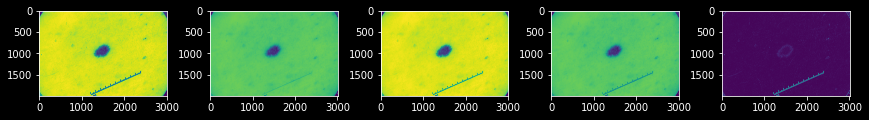

In [21]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 10))
axes[0].imshow(erosion)
axes[1].imshow(dilation)
axes[2].imshow(opening)
axes[3].imshow(closing)
axes[4].imshow(gradient)
fig.tight_layout()


***

# Explore the segmentation mask

In [23]:
# Show the images overlayed, for this we can use PIL 
#!pip install pillow 
from PIL import Image 

# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/processed/ISIC_0001769_customized.png') 

# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2)          

ValueError: images do not match

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('../data/example_image/ISIC_0012099.jpg')
gray = rgb2gray(img1)

# final_binary_mask
final_binary_mask = (gray < 120)
#plt.savefig()
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(gray)
axes[1].imshow(final_binary_mask, cmap='gray')
fig.tight_layout()


In [25]:
# convert array back to integers from booleans
final_binary_mask = final_binary_mask.astype(int)

# Measurements and masks

In [26]:
im = plt.imread('../data/example_image/ISIC_0012099.jpg')

mask=plt.imread('../data/example_segmentation/ISIC_0012099_segmentation.png')


In [27]:
# total size of the image

total = mask.shape[0] * mask.shape[1]
print("total size of the image is ", total)


total size of the image is  6016000


In [28]:
# size of mask only: sum of all pixel values in the mask

area = np.sum(mask)
print("size of area is", area)

size of area is 88455.0


1.4703291223404256


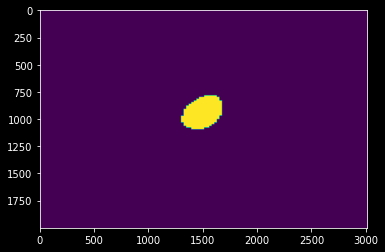

In [29]:
# as percentage

print(area/total*100)
plt.imshow(mask)

## Measurement: width/height

In [30]:

pixels_in_col = np.max(np.sum(mask, axis=0))
pixels_in_row = np.max(np.sum(mask, axis=1))
print("Number of pixels in column is, also known as width \n",pixels_in_col, '\n')

print("Number of pixels in row is, also known as height \n",pixels_in_row)

Number of pixels in column is, also known as width 
 297.0 

Number of pixels in row is, also known as height 
 353.0


## Measurement: diameter at an angle

In [31]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(mask)
axes[1].imshow(rot_im, cmap='gray')
fig.tight_layout()

NameError: name 'rot_im' is not defined

# Crop and center segnmentation mask in the middle of image

In [34]:
import os 
import cv2
import numpy as np

mask = cv2.imread('../data/example_segmentation/ISIC_0012099_segmentation.png', 0)


height, width = mask.shape
x,y,w,h = cv2.boundingRect(mask)

# Create new blank image and shift ROI to new coordinates
image_mask = np.zeros(mask.shape, dtype=np.uint8)
ROI = mask[y:y+h, x:x+w]
x = width//2 - ROI.shape[0]//2 
y = height//2 - ROI.shape[1]//2 
image_mask[y:y+h, x:x+w] = ROI

# cropped version of segmentation mask
cv2.imshow('ROI', ROI)

# original version of segmentation mask
cv2.imshow('mask', image_mask)



# press 0 to stop the processing
#cv2.waitKey(0)

In [35]:
import cv2
import numpy as np
src1 = cv2.imread('../data/example_image/ISIC_0012099.jpg')
mask = cv2.imread('../data/example_segmentation/ISIC_0012099_segmentation.png', 0)

#change mask to a 3 channel image 
src1_mask=cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

mask_out=cv2.subtract(src1_mask,src1)
mask_out=cv2.subtract(src1_mask,mask_out)

height, width = mask.shape
x,y,w,h = cv2.boundingRect(mask)

# Create new blank image and shift ROI to new coordinates
image_mask = np.zeros(mask.shape, dtype=np.uint8)
mask_out = mask[y:y+h, x:x+w]
x = width//2 - mask_out.shape[0]//2 
y = height//2 - mask_out.shape[1]//2 
image_mask[y:y+h, x:x+w] = mask_out

cv2.imshow('original image', src1)
cv2.imshow('greyscale mask', mask)
cv2.imshow('cropped coloured mask', image_mask)
cv2.imshow('colored masked image', mask_out)
#cv2.waitKey(0)


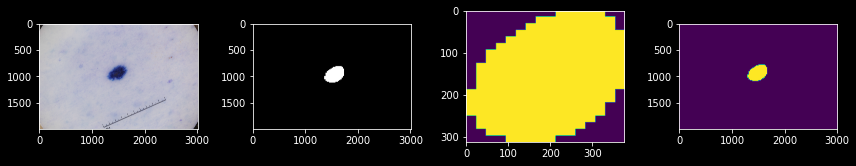

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 10))
axes[0].imshow(src1)
axes[1].imshow(image_mask, cmap="gray")
axes[2].imshow(mask_out)
axes[3].imshow(mask)
fig.tight_layout()

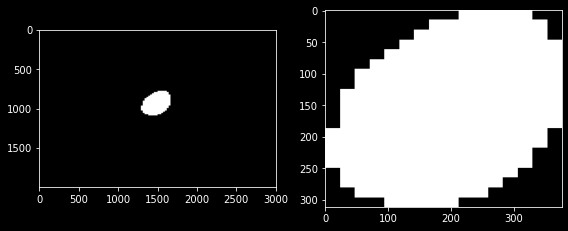

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(ROI, cmap='gray')
fig.tight_layout()


# Find perimeter using morphology

_perimeter is the sum of pixels on the border_

In [38]:
from skimage import morphology

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(20)

print(struct_el)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Area of mask: 88455.0
Mask Eroded:  64490


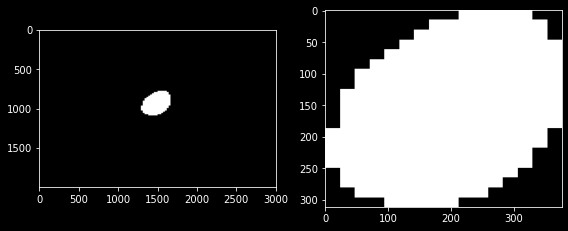

In [39]:
from skimage import morphology

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(20)

mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(ROI, cmap='gray')
fig.tight_layout()

# Verify it's smaller
print("Area of mask:", area)
print("Mask Eroded: ", np.sum(mask_eroded))

The perimeter or border of the area is 22491535


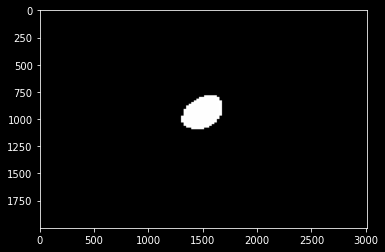

In [40]:
# Subtract the two masks from each other to get the border/perimeter

image_perimeter = mask - mask_eroded

plt.imshow(image_perimeter, cmap='gray') #The perimeter is very thin so it might be difficult to see on the screen

#What is the length? 
print('The perimeter or border of the area is', np.sum(image_perimeter))

# Creating your own mask

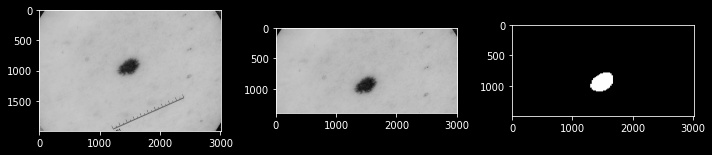

In [41]:
# Work with color image as grayscale

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(im)


# Let's get rid of the marker
gray2 = gray[0:1400,:]
mask2 = mask[0:1500,:]

# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
axes[0].imshow(gray, cmap='gray')
axes[1].imshow(gray2, cmap='gray')
axes[2].imshow(mask2, cmap='gray')

fig.tight_layout()


In [42]:
#Look at intensities of image
#plt.hist(gray2)


In [ ]:
# Threshold
#mymask = gray2 < 120  #Pixels with lower intensities will be equal to 1 in the mask




# Filtering

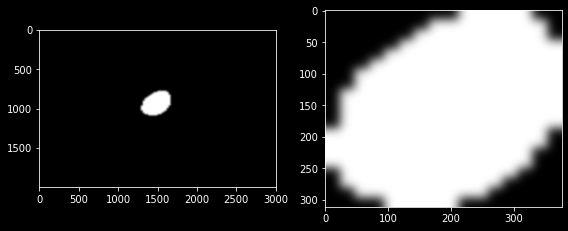

In [43]:
# Gaussian filtering (blur)

from skimage import filters

blurred_ROI = filters.gaussian(ROI,sigma=8)
blurred_mask = filters.gaussian(mask,sigma=10)

# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(blurred_mask, cmap='gray')
axes[1].imshow(blurred_ROI, cmap='gray')
fig.tight_layout()

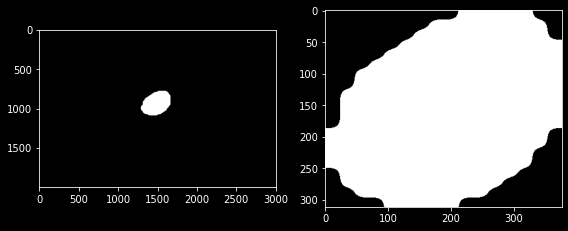

In [44]:
# Threshold again

ROI_2 = blurred_ROI > 0.5
mask_2 = blurred_mask > 0.5

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(mask_2, cmap='gray')
axes[1].imshow(ROI_2, cmap='gray')
fig.tight_layout()

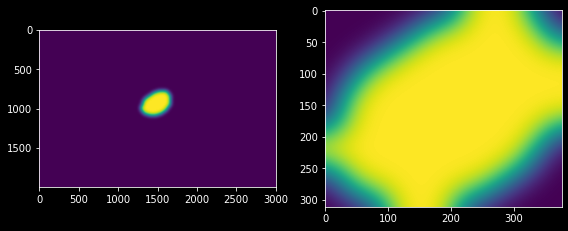

In [45]:
# Blur color image - this could be useful for measuring color (variability)

blurred_mask_color = filters.gaussian(mask,sigma=25)
blurred_ROI_colour = filters.gaussian(ROI,sigma=25)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(blurred_mask_color)
axes[1].imshow(blurred_ROI_colour)
fig.tight_layout()

# General purpose features

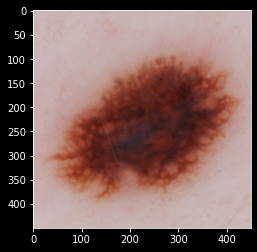

In [46]:
# Many examples in https://scikit-image.org/docs/dev/api/skimage.feature.html 

# Crop image first manually
im2 = im[700:1150,1250:1700,:]
mask2 = mask[700:1150,1250:1700]

plt.imshow(im2)

In [47]:
# Gaussian features recently available (might need to update version)

# Example segmentation for microscopy image: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_trainable_segmentation.html#sphx-glr-auto-examples-segmentation-plot-trainable-segmentation-py 

#!pip install scikit-image==0.18.0

In [48]:

from skimage import feature
from functools import partial 

#Extract feature images
feat_im = feature.multiscale_basic_features(im2, multichannel=True, intensity=False, edges=False, texture=True)
print(feat_im.shape)


(450, 450, 36)


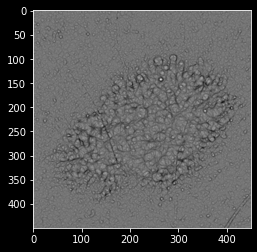

In [49]:
plt.imshow(feat_im[:,:,3], cmap='gray')


[   86   122   383  1068  3163 85589 69471 15044 11804  7946  4844  1585
   780   392   142    81]


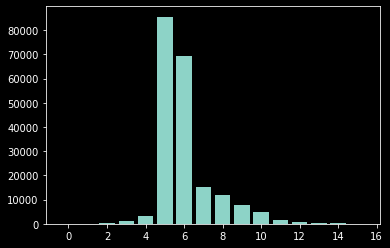

In [50]:
# We measured X features for every pixel in the image - this is good for segmentation, but not image classification yet

# For classification we need to aggregate the outputs for each feature type into one vector

feat_vec, bin_edges = np.histogram(feat_im[:,:,8], bins=16)

plt.bar(np.arange(0,16), feat_vec)
print(feat_vec)

***

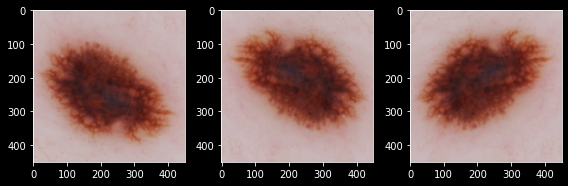

In [51]:
# Flipping the image around y-axis (horizontal flipping)
flipped_y = cv2.flip(im2, 1)

# Flipping the image around x-axis (vertical flipping)
flipped_x = cv2.flip(im2, 0)

# Flipping the image around both axes
flipped_both = cv2.flip(im2, -1)

# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes[0].imshow(flipped_y)
axes[1].imshow(flipped_x)
axes[2].imshow(flipped_both)
fig.tight_layout()

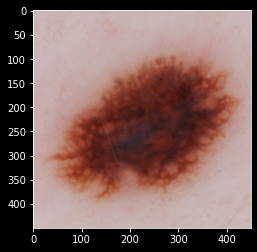

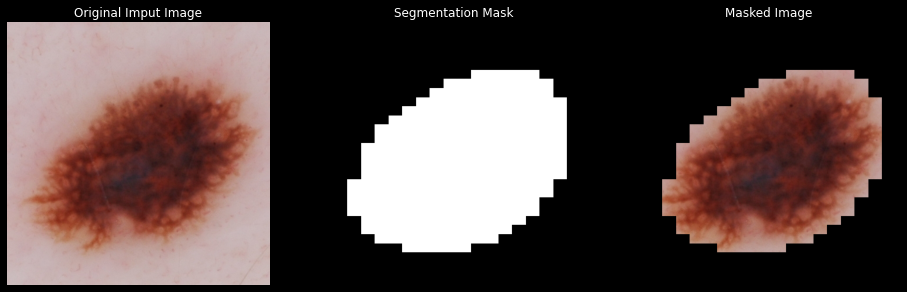

In [52]:
#cropped version
im = plt.imread('../data/example_image/ISIC_0012099.jpg')

mask=plt.imread('../data/example_segmentation/ISIC_0012099_segmentation.png')

# Crop image first manually
im2 = im[700:1150,1250:1700,:]
mask2 = mask[700:1150,1250:1700]

plt.imshow(im2)
input_img = im2 #original image
mask_img  = mask2 #segmentation image

# select only masked area below
masked = input_img.copy()
masked[mask_img == 0 ] = 0

fig, axes = plt.subplots(1, 3, figsize=(16, 12))
ax = axes.flatten()

ax[0].imshow(input_img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Imput Image", fontsize=12, c = 'w')

ax[1].imshow(mask_img, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("Segmentation Mask", fontsize=12, c = 'w')

ax[2].imshow(masked, cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Masked Image", fontsize=12, c = 'w')

plt.show()



# TASK 1: ABC FEATURES - ASYMMETRY SHAPE

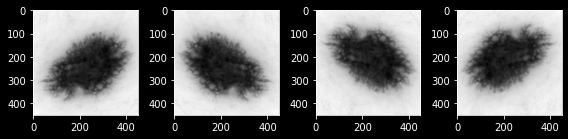

In [53]:
# same images flipped vertically and horizontally 

original_img = rgb2gray(input_img)
mask_flipped_y = rgb2gray(flipped_y)
mask_flipped_x = rgb2gray(flipped_x)
mask_flipped_both  = rgb2gray(flipped_both)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 10))
axes[0].imshow(original_img, cmap='gray')
axes[1].imshow(mask_flipped_y, cmap='gray')
axes[2].imshow(mask_flipped_x, cmap='gray')
axes[3].imshow(mask_flipped_both, cmap='gray')
fig.tight_layout()


In [54]:

# Idea for implementing crop function for saved customized segmentation masks of all images

# = 'data/example_ground_truth.csv'
#df = pd.read_csv(file_data)

# path for all images
#path_image = 'data/example_image'

# insert all image_ids into list
#image_id = list(df['image_id'])

# read all image files
#file_img = cv2.imread(path_image + os.sep + image_id[i] + '.jpg', 0)



# customize masks by original image
    # turn image into grayscale def rgb2gray
        # gray_X = rgb2gray(X)
    # change variable into array int
    # call function for threshold_mask 
    # save all new images under customized segmentation .png

# crop all images by customized masks 
    # read all customized segmentation masks
    # read all images
    # crop by ROI and image_mask
    # save alle images for further analysis

# rotate all customized segmentation masks for asymmetric analysis
    # purpose: to prevent errors during overlapping
    # if image is cylinder but not angled vertically/horizontally 90 degrees by center point, 
    # there will be non-overlapping bits even though this form is symmetric. 




In [55]:
gray_X_mask = threshold_mask(gray_X)
gray_X_mask.astype(int)

NameError: name 'gray_X' is not defined

In [ ]:
# press 0 to stop the processing
#cv2.waitKey(0)

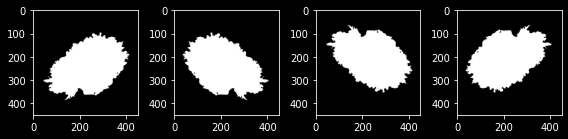

In [70]:
# Threshold: for customizing our own masks for each image
def threshold_mask(mask):
    custom_mask = mask < 120 #from plt.hist function
    return custom_mask

cust_mask_orignal = threshold_mask(original_img)
cust_mask_y = threshold_mask(mask_flipped_y)
cust_mask_x = threshold_mask(mask_flipped_x)
cust_mask_both = threshold_mask(mask_flipped_both)


# subplot of same flipped masked image
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 10))
axes[0].imshow(cust_mask_orignal, cmap='gray')
axes[1].imshow(cust_mask_y, cmap='gray')
axes[2].imshow(cust_mask_x, cmap='gray')
axes[3].imshow(cust_mask_both, cmap='gray')
fig.tight_layout()



In [71]:
# Set customized mask to float
cust_mask_orignal.astype(float)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Find center points of each segmentation masked image
_ code by Gino Franco Fazzi_

In [72]:
def centerpoint(mask):
    borders = np.where(mask != 0) # This will return 2 arrays with the index where the pixels are ones
    up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((up+down) //2, (left + right) //2) # Tuple with the coordinates for the center of the lesion
    return center

#print(borders)
#print(up, down, left, right)
#print(center)


center_original_img = centerpoint(input_img)
center_seg_mask = centerpoint(mask_img)
center_cust_mask = centerpoint(cust_mask_orignal)

print('Center point coordinates of masked image is:', center_original_img)
print('Center point coordinates of masked image is:', center_seg_mask)
print('Center point coordinates of masked image is:', center_cust_mask)



Center point coordinates of masked image is: (224, 224)
Center point coordinates of masked image is: (237, 230)
Center point coordinates of masked image is: (240, 228)


***

## Original image

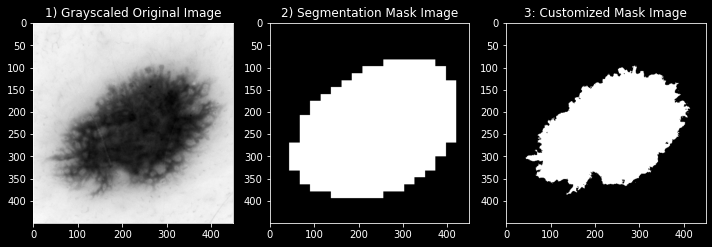

In [73]:
original_img[:,center_original_img[0]:]
mask_img[:,center_seg_mask[0]:]
cust_mask_orignal[:,center_cust_mask[0]:]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
axes[0].imshow(original_img, cmap="gray")
axes[0].set_title("1) Grayscaled Original Image", fontsize=12, c = 'w')

axes[1].imshow(mask_img, cmap='gray')
axes[1].set_title("2) Segmentation Mask Image", fontsize=12, c = 'w')

axes[2].imshow(cust_mask_orignal, cmap='gray')
axes[2].set_title("3: Customized Mask Image", fontsize=12, c = 'w')
fig.tight_layout()


## Horizontal Asymmetry Analysis for Segmentation Mask

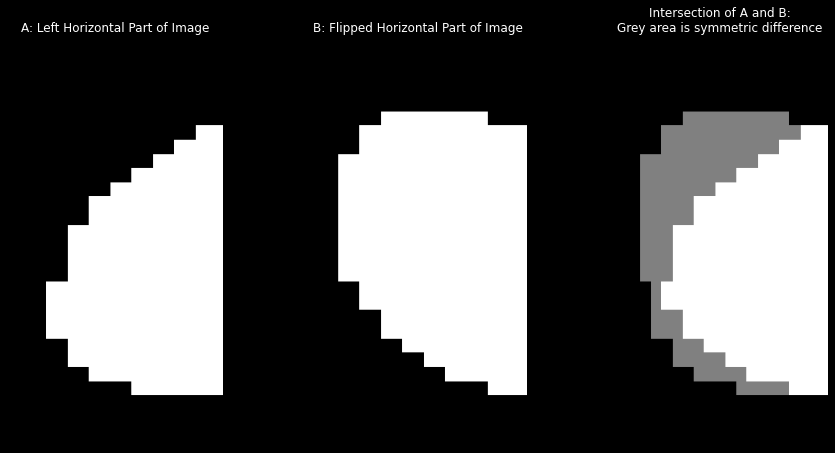

In [86]:

# Left part of center line
left_horizontal_img = mask_img[:,0:center_seg_mask[0]+1]

# right part mirrored over the center line
right_flipped_img = np.fliplr(mask_img)[:,0:center_seg_mask[0]+1]

overlapping_left_horizontal = cv2.addWeighted(left_horizontal_img, 0.5, right_flipped_img, 0.5, 1.0)
#plt.imshow(overlapping_left_horizontal)

def horizontal_asymmetry_left_plot(left_horizontal_image, right_flipped_image, left_overlapping_images):
    fig, axes = plt.subplots(1, 3, figsize=(6, 8))

    ax = axes.flatten()
    ax[0].imshow(left_horizontal_image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("A: Left Horizontal Part of Image", fontsize=12, c = 'w')

    ax[1].imshow(right_flipped_image, cmap="gray")
    ax[1].set_axis_off()
    ax[1].set_title("B: Flipped Horizontal Part of Image", fontsize=12, c = 'w')

    ax[2].imshow(left_overlapping_images, cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Intersection of A and B:\nGrey area is symmetric difference", fontsize=12, c = 'w')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=2.0, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    

horizontal_asymmetry_left_plot(left_horizontal_img, right_flipped_img, overlapping_left_horizontal)

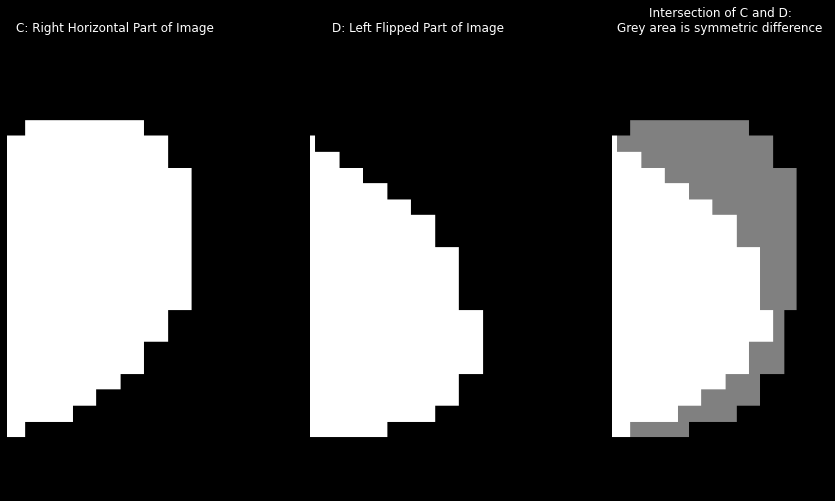

In [87]:
# Right part of the center line
right_horizontal_img = mask_img[:,center_seg_mask[0]:]

# Left part mirrored over the center line
left_flipped_img = np.fliplr(mask_img)[:,center_seg_mask[0]:]

overlapping_right_horizontal = cv2.addWeighted(right_horizontal_img, 0.5, left_flipped_img, 0.5, 1.0)
#plt.imshow(overlapping_left_horizontal)

def horizontal_asymmetry_right_plot(right_image, left_flipped_image, right_overlapping_images):
    fig, axes = plt.subplots(1, 3, figsize=(6, 8))
    ax = axes.flatten()

    ax[0].imshow(right_image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("C: Right Horizontal Part of Image", fontsize=12, c = 'w')

    ax[1].imshow(left_flipped_image, cmap="gray")
    ax[1].set_axis_off()
    ax[1].set_title("D: Left Flipped Part of Image", fontsize=12, c = 'w')

    ax[2].imshow(right_overlapping_images, cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Intersection of C and D:\nGrey area is symmetric difference", fontsize=12, c = 'w')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=2.0, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    #plt.show()

horizontal_asymmetry_right_plot(right_horizontal_img, left_flipped_img,overlapping_right_horizontal)

# Left part plus the right part - see below
# The white part of the figure are where the two parts intersect (overlapping)
# The gray part is where the figures are non-overlapping

# Horizontal Asymmetry Analysis of customized mask

In [88]:
# Left part of center line
left_horizontal_cust = cust_mask_orignal[:,0:center_cust_mask[0]+1].astype(float)

# right part mirrored over the center line
right_flipped_cust = np.fliplr(cust_mask_orignal)[:,0:center_cust_mask[0]+1].astype(float)

overlap_left_cust = cv2.addWeighted(left_horizontal_cust, 0.5, right_flipped_cust, 0.5, 1.0)


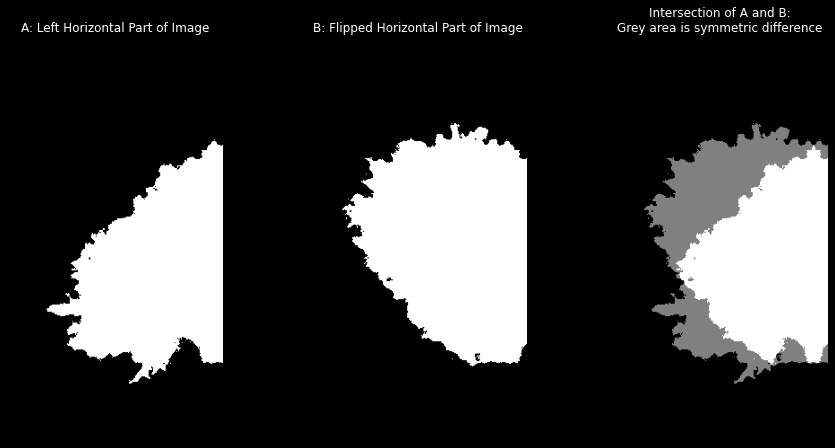

In [89]:
horizontal_asymmetry_left_plot(left_horizontal_cust, right_flipped_cust, overlap_left_cust)

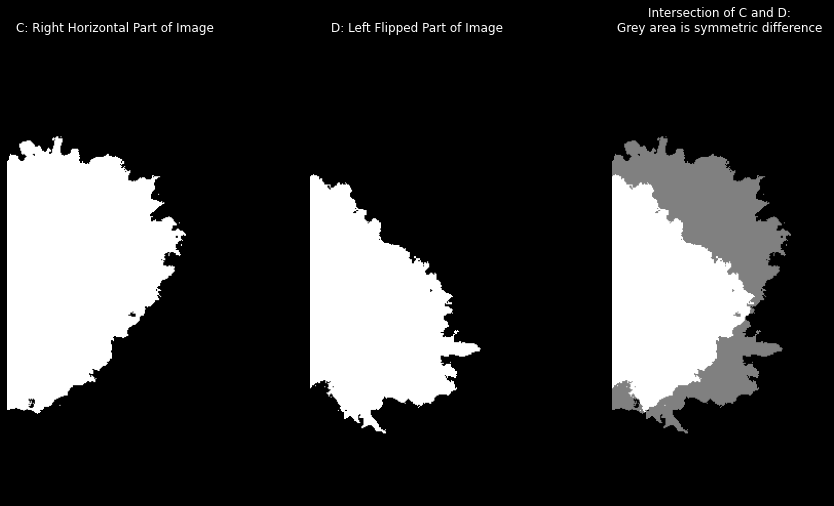

In [90]:
# Right part of the center line
right_horizontal_cust = cust_mask_orignal[:,center_cust_mask[0]:].astype(float)

# Left part mirrored over the center line
left_flipped_cust = np.fliplr(cust_mask_orignal)[:,center_cust_mask[0]:].astype(float)

overlapping_right_horizontal_cust = cv2.addWeighted(right_horizontal_cust, 0.5, left_flipped_cust, 0.5, 1.0)

horizontal_asymmetry_right_plot(right_horizontal_cust, left_flipped_cust, overlapping_right_horizontal_cust)

## Calculation of symmetric area and asymmetric area of: 

We will calculate symmetric values by unionizing the two halves images, and asymmetric values by intersecting the two halves.

_ 
a) horizontal right part and leff flipped part of image and 
b) horizontal left and right flipped part of image
_

In [91]:
def subplots_asymmetry(image, flipped_image):
    img_bwa = cv2.bitwise_and(image,flipped_image)
    img_bwo = cv2.bitwise_or(image,flipped_image)
    img_bwx = cv2.bitwise_xor(image,flipped_image)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
    axes[0].imshow(img_bwa, cmap='gray')
    axes[0].set_title("Intersection of Images ", fontsize=12, c = 'w')

    axes[1].imshow(img_bwo, cmap='gray')
    axes[1].set_title("Union of Images", fontsize=12, c = 'w')

    axes[2].imshow(img_bwx, cmap='gray')
    axes[2].set_title("Symmetric Difference of Images", fontsize=12, c = 'w')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=1.0, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

    #fig.tight_layout()

_____________________________________________

Right Horizontal Part
_____________________________________________

Intersection of Image A and B: 
 30660

Union of Image A and B: 
 50667

Symmetric Differene of Image A and B: 
 20007
_____________________________________________

Subplot of Right Horizontal Part
_____________________________________________



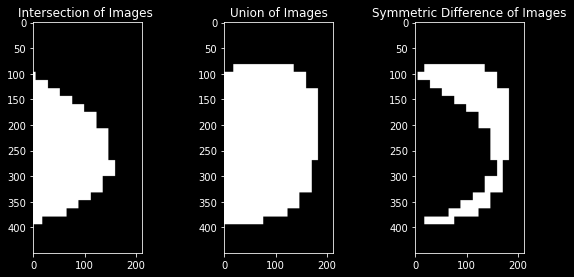

In [92]:
# a)
def right_horizontal_symmetry(right_horizontal_image, left_flipped_image):
    img_bwa = cv2.bitwise_and(right_horizontal_image,left_flipped_image)
    img_bwo = cv2.bitwise_or(right_horizontal_image,left_flipped_image)
    img_bwx = cv2.bitwise_xor(right_horizontal_image,left_flipped_image)
    symmetry_right = np.count_nonzero(img_bwa)
    total_size_right = np.count_nonzero(img_bwo)
    asymmetry_right = np.count_nonzero(img_bwx)
    return symmetry_right, total_size_right, asymmetry_right

intersection_right_horizontal, union_right, symmetric_diff_right_horizontal = right_horizontal_symmetry(right_horizontal_img, left_flipped_img)


print("___" * 15)
print("\nRight Horizontal Part")
print("___" *15)

print("\nIntersection of Image A and B: \n", intersection_right_horizontal)
print("\nUnion of Image A and B: \n", union_right)
print("\nSymmetric Differene of Image A and B: \n", symmetric_diff_right_horizontal)


print("___" * 15)
print("\nSubplot of Right Horizontal Part")
print("___" *15)
print("")
subplots_asymmetry(right_horizontal_img, left_flipped_img)

_____________________________________________

Left Horizontal Part
_____________________________________________

Intersetion of Image D and C:
 38085

Union of Image D and C:
 58092

Symmetric Difference of Image D and C:
 20007
_____________________________________________

Subplot of Left Horizontal Part
_____________________________________________



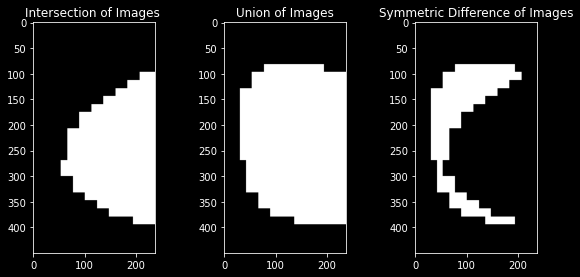

In [93]:
#b)
def left_horizontal_symmetry(left_horizontal_image, right_flipped_image):
    img_bwa = cv2.bitwise_and(left_horizontal_image,right_flipped_image)
    img_bwo = cv2.bitwise_or(left_horizontal_image,right_flipped_image)
    img_bwx = cv2.bitwise_xor(left_horizontal_image,right_flipped_image)
    symmetry_left = np.count_nonzero(img_bwa)
    total_size_left = np.count_nonzero(img_bwo)
    asymmetry_left = np.count_nonzero(img_bwx)
    return symmetry_left, total_size_left, asymmetry_left

intersection_left_horizontal, union_left, symmetric_diff_left_horizontal = left_horizontal_symmetry(left_horizontal_img, right_flipped_img)

print("___" * 15)
print("\nLeft Horizontal Part")
print("___" * 15)
print("\nIntersetion of Image D and C:\n", intersection_left_horizontal)
print("\nUnion of Image D and C:\n", union_left)
print("\nSymmetric Difference of Image D and C:\n", symmetric_diff_left_horizontal)


print("___" * 15)
print("\nSubplot of Left Horizontal Part")
print("___" *15)
print("")
subplots_asymmetry(left_horizontal_img, right_flipped_img)


## Calculation of symmetric area and asymmetric area of _*customized mask*_: 

We will calculate symmetric values by unionizing the two halves images, and asymmetric values by intersecting the two halves.

_ 
a) horizontal right part and leff flipped part of image and 
b) horizontal left and right flipped part of image
_

_____________________________________________

Right Horizontal Part
_____________________________________________


Intersection of Image A and B: 
 19211

Union of Image A and B: 
 35756

Symmetric Differene of Image A and B: 
 16545
_____________________________________________

Subplot of Right Horizontal Part
_____________________________________________



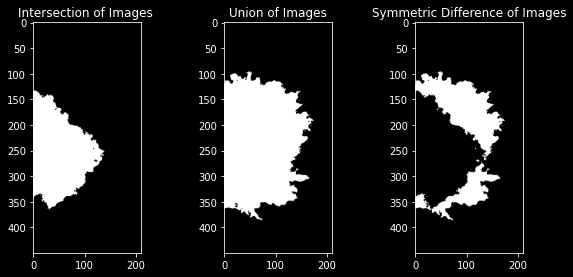

In [95]:

intersection_right_horizontal_cust, union_right_cust, symmetric_diff_right_horizontal_cust = right_horizontal_symmetry(right_horizontal_cust, left_flipped_cust)
print("___" * 15)
print("\nRight Horizontal Part")
print("___" *15)
print("")

print("\nIntersection of Image A and B: \n", intersection_right_horizontal_cust)
print("\nUnion of Image A and B: \n", union_right_cust)
print("\nSymmetric Differene of Image A and B: \n", symmetric_diff_right_horizontal_cust)


print("___" * 15)
print("\nSubplot of Right Horizontal Part")
print("___" *15)
print("")
subplots_asymmetry(right_horizontal_cust, left_flipped_cust)


_____________________________________________

Left Horizontal Part
_____________________________________________


Intersetion of Image D and C:
 26172

Union of Image D and C:
 43329

Symmetric Difference of Image D and C:
 17157
_____________________________________________

Subplot of Left Horizontal Part
_____________________________________________



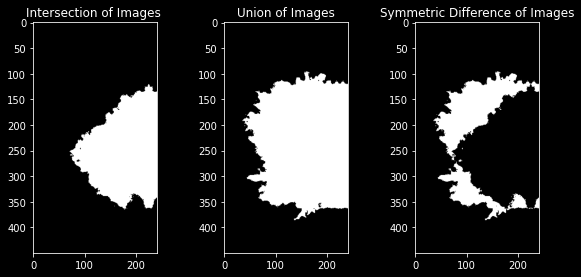

In [96]:
intersection_left_horizontal_cust, union_left_cust, symmetric_diff_left_horizontal_cust = left_horizontal_symmetry(left_horizontal_cust, right_flipped_cust)

print("___" * 15)
print("\nLeft Horizontal Part")
print("___" * 15)
print("")

print("\nIntersetion of Image D and C:\n", intersection_left_horizontal_cust)
print("\nUnion of Image D and C:\n", union_left_cust)
print("\nSymmetric Difference of Image D and C:\n", symmetric_diff_left_horizontal_cust)

print("___" * 15)
print("\nSubplot of Left Horizontal Part")
print("___" *15)
print("")
subplots_asymmetry(left_horizontal_cust, right_flipped_cust)



## Hammoude Distance (HM): To help determine astrymmetry for the two parts

_ N is the number of pixels for union of image A and B and intersection of image A and B_ 

The distance measure used to measure the errors between the segmented parts. HM is based on a pixel by pixel comparison of the pixels enclosed by two boundaries.

In [97]:
N_union = np.sum(union_left_cust)
N_intersec = np.sum(intersection_left_horizontal_cust)
print(N_union)
print(N_intersec)


HM = (N_union - N_intersec)/N_union
print(HM)

43329
26172
0.39597036626739596


## Vertical Asymmetry Analysis

In [ ]:
# Segmentation mask flipped for vertical asymmetrical analysis of shape

flipped_mask = cv2.flip(mask_img, 1)
plt.imshow(flipped_mask)

In [ ]:
# center points of flipped mask
flipped_mask_center = centerpoint(flipped_mask)
print("Mask: Coordinates of center point is", flipped_mask_center)

## Vertical Part of Segmentation Mask Above Central Line

In [ ]:
# part the segmentation mask vertically in two halves on y-axis by central point 218
vertical_up = flipped_mask[:flipped_mask_center[1]:,:]


#mirrored part 
vertical_up_flipped = np.fliplr(vertical_up)


#asymmetry of the two halves by overlapping 'vertical up' with 'vertical up flipped'
overlapping_up_vertical = cv2.addWeighted(vertical_up, 0.5, vertical_up_flipped, 0.5, 1.0)
#plt.imshow(overlapping_up_vertical)


In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(14, 12))
ax = axes.flatten()

ax[0].imshow(vertical_up)
ax[0].set_axis_off()
ax[0].set_title("A) Vertical Part Above Center Line ", fontsize=12, c = 'w')

ax[1].imshow(vertical_up_flipped)
ax[1].set_axis_off()
ax[1].set_title("B) Vertical Part Flipped Above Center Line", fontsize=12, c = 'w')

ax[2].imshow(overlapping_up_vertical)
ax[2].set_axis_off()
ax[2].set_title("Vertical Asymmetry of A and B", fontsize=12, c = 'w')

plt.show()

#the grey part shows the non-overlapping parts of the two images

## Vertical Part of Segmentation Mask Under Central Line

In [ ]:
# part the segmentation mask vertically in two halves on y-axis by central point 218
vertical_down = flipped_mask[flipped_mask_center[1]:,:]
#plt.imshow(vertical_down)


#mirrored part 
vertical_down_flipped = np.fliplr(vertical_down)

#asymmetry of the two halves by overlapping 'vertical down' with 'vertical down flipped'
overlapping_down_vertical = cv2.addWeighted(vertical_down, 0.5, vertical_down_flipped, 0.5, 1.0)


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 12))
ax = axes.flatten()

ax[0].imshow(vertical_down)
ax[0].set_axis_off()
ax[0].set_title("C) Vertical Part Under Center Line ", fontsize=12, c = 'w')

ax[1].imshow(vertical_down_flipped)
ax[1].set_axis_off()
ax[1].set_title("D) Vertical Part Flipped Under Center Line", fontsize=12, c = 'w')

ax[2].imshow(overlapping_down_vertical)
ax[2].set_axis_off()
ax[2].set_title("Vertical Asymmetry of C and D", fontsize=12, c = 'w')


plt.show()

#the grey part shows the non-overlapping parts of the two images

# Load Data: example_ground_truth.csv and features.csv

In [ ]:
file_data = '../data/example_ground_truth.csv'
file_features = '../features/features.csv'

df = pd.read_csv(file_data)
features = pd.read_csv(file_features)

df = pd.read_csv(file_data)
features = pd.read_csv(file_features)


# Combine variables we want in one place
df = df.drop(['image_id','seborrheic_keratosis'],axis=1)
df['area'] = features['area']
df['perimeter'] = features['perimeter']

print(df.head())


## Data Frames for all our files

In [ ]:
#features
file_features_df 

#melanoma
melanoma_df

#melanoma and features
merge_feature_melanoma

#non_malignant and features
print(merge_feature_non_malignant_df)

# Plots of Features

## Melanoma and Features

In [ ]:
# Melanoma

import seaborn as sns


df1 = df[['area','perimeter']]
sns.boxplot(data=df1, width=0.5)


In [ ]:
# Let's scale the features
from sklearn import preprocessing

#Fit scaler on our data
scaler = preprocessing.StandardScaler().fit(df1)

#Apply to data itself
df2 = scaler.transform(df1)

print(df2.mean()) #small number close to 0, round of error
print(df2.var())  #equal to 1 
sns.boxplot(data=df2, width=0.5,fliersize=5) #we see both negative and positive values, since the mean is 0

In [ ]:

# Look at values#print(df2.dtype) #scaler lost df information :(
df2 = pd.DataFrame(df2,columns=['area','perimeter'])

# Look at values per class
df2['melanoma'] = df['melanoma']
sns.pairplot(df2, hue="melanoma", height=3,diag_kind="hist") 


In [ ]:
ax = sns.violinplot(x="melanoma", y="area", data=df2,size=8)

## Non-malignant and Features

In [ ]:
df_non_malignant_boxplot = merge_feature_non_malignant_df[['area','perimeter']]
sns.boxplot(data=df_non_malignant_boxplot, width=0.5)

# Feature Selection

In [ ]:
# Split the data before feature selection
from sklearn.model_selection import train_test_split

# Some noisy data not correlated
noise = np.random.RandomState(42).uniform(0, 0.1, size=(df2.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((df2[['area', 'perimeter']], noise))
y = df2['melanoma']

# Split dataset to select feature and evaluate the classifier
X_dev, X_test, y_dev, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
        X_dev, y_dev, stratify=y_dev)


In [ ]:
# Univariate feature selection with mutual information for feature scoring
from sklearn.feature_selection import mutual_info_classif, SelectKBest

selector = SelectKBest(mutual_info_classif, k=2)
selector.fit(X_train, y_train)

scores = selector.scores_

plt.bar(np.arange(0,22), scores, width=.2,
        label=r'Feature score')

# Train several classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Select features that had good scores on training set
X_train1 = X_train[:, [0,1]]
X_train2 = selector.transform(X_train)

# Train a classifier
knn1 = KNeighborsClassifier(n_neighbors=1) # other hyperparameters possible
knn1trained = knn1.fit(X_train2, y_train)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2trained = knn2.fit(X_train2, y_train)

tree1 = DecisionTreeClassifier() # various hyperparameters
tree1trained = tree1.fit(X_train2, y_train)


# Evaluate classifiers on validation set

In [ ]:
#Select the same features as before
X_val1 = X_val[:, [0,1]]
X_val2 = selector.transform(X_val)

y_val_knn1 = knn1trained.predict(X_val2)
y_val_knn2 = knn2trained.predict(X_val2)

# Simple accuracy
print(np.sum(y_val_knn1 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_knn2 == y_val) / np.size(y_val) * 100)

In [ ]:
from sklearn.metrics import accuracy_score

acc_knn1 = accuracy_score(y_val, y_val_knn1)
acc_knn2 = accuracy_score(y_val, y_val_knn2)

print(acc_knn1)
print(acc_knn2)

In [ ]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_val, y_val_knn1)
auc2 = roc_auc_score(y_val, y_val_knn2)

print(auc1)
print(auc2)

In [ ]:
# ONLY FOR REPORTING, also evaluate on test set
X_test = X_test[:, [0,1]]

y_test_knn1 = knn2trained.predict(X_test)

acc_test = accuracy_score(y_test, y_test_knn1)
auc_test = roc_auc_score(y_test, y_test_knn1)

print(acc_test)
print(auc_test)

# For small datasets these results will depend on the random seed you chose when splitting, this is why it is good to look at multiple splits/cross-validation

# Scatter plot

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from skimage import morphology
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score


import fyp2021p3_group00_functions as util

file_data = '../data/example_ground_truth.csv'
path_image = '../data/example_image'
path_mask = '../data/example_segmentation'

file_features = '../features/features.csv'

df = pd.read_csv(file_data)


In [ ]:
image_id = list(df['image_id'])

# data frame for images with no diagnosis
#df1 = df.loc[(df['melanoma'] == 0.0) & (df["seborrheic_keratosis"] == 0.0)]

#is_non_malignant = df1.drop(["image_id"], axis = 1)
#is_non_malignant = np.array(is_non_malignant['melanoma'] + is_non_malignant['seborrheic_keratosis'])

is_melanoma = np.array(df['melanoma'])
is_keratosis = np.array(df['seborrheic_keratosis'])
 
num_images = len(image_id)


In [ ]:
features_area = np.empty([num_images,1])
features_area[:] = np.nan

features_perimeter = np.empty([num_images,1])
features_perimeter[:] = np.nan

image_dtype = np.empty([num_images,1])
image_dtype[:] = np.nan

image_height = np.empty([num_images,1])
image_height[:] = np.nan

image_width = np.empty([num_images,1])
image_width[:] = np.nan

dimension_image = np.empty([num_images,1])
dimension_image[:] = np.nan

image_size = np.empty([num_images,1])
image_size[:] = np.nan

image_max = np.empty([num_images,1])
image_max[:] = np.nan

image_min = np.empty([num_images,1])
image_min[:] = np.nan

In [ ]:

for i in np.arange(num_images):
    
    # Define filenames related to this image
    file_image = path_image + os.sep + image_id[i] + '.jpg'
    file_mask = path_mask + os.sep + image_id[i] + '_segmentation.png'
    

    # Read the images with these filenames
    im = plt.imread(file_image)
    mask = plt.imread(file_mask)
    
    # Measure features
    a, p = util.measure_area_perimeter(mask)
    
    # Store in the variables we created before
    features_area[i,0] = a
    features_perimeter[i,0] = p

    # Store properties of images
    image_dtype = im.dtype
    image_height[i,0] = im.shape[0] 
    image_width[i,0] = im.shape[1]
    dimension_image[i,0] =  im.ndim #three layers: Red, Green, Blue
    image_size[i,0] = im.size
    image_max[i,0] = im.max()
    image_min[i,0] = im.min()
   

    



In [ ]:
# Store these features so you can reuse them later
feature_data = {"image_id": image_id, 
                "area": features_area.flatten(),
                "perimeter": features_perimeter.flatten()
                }

df_features = pd.DataFrame(feature_data)
df_features.to_csv(file_features, index=False) 
df_features

In [ ]:
# Dataframe: properties of images 
properties_image = {"image_id": image_id,
                    "image_type": image_dtype,
                    "image_height": image_height.flatten(),
                    "image_width": image_width.flatten(),
                    "dimension": dimension_image.flatten(),
                    "image_size": image_size.flatten(),
                    "image_max": image_max.flatten(),
                    "image_min": image_min.flatten()
                    }
df_properties_img = pd.DataFrame(properties_image)
df_properties_img     

In [ ]:
#filter out all images that are not melanoma
melanoma = df[df["melanoma"] == 1.0]
print("Total number of data for Melanoma: ",melanoma_df.shape)

#filter out all images that are not keratosis
keratosis = df[df["seborrheic_keratosis"] == 1.0]
print("Total number of data for Keratosis: ", keratosis.shape)


In [ ]:
keratosis_df = keratosis.drop(["melanoma"], axis = 1)
print(keratosis_df.shape)

In [ ]:
df_keratosis_prop = df_properties_img.merge(keratosis_df, on='image_id', how='right')
df_keratosis_prop

***

In [ ]:
#remove column for keratosis
melanoma_df = melanoma.drop(["seborrheic_keratosis"], axis = 1)
print(melanoma_df.shape)

In [ ]:
df_melanoma_prop = df_properties_img.merge(melanoma_df, on='image_id', how='right')
df_melanoma_prop

***

In [ ]:
df_melanoma_prop_feat = df_melanoma_prop.merge(df_features, on='image_id', how='left')
df_melanoma_prop_feat

In [ ]:
df_keratosis_prop_feat = df_keratosis_prop.merge(df_features, on='image_id', how='left')
df_keratosis_prop_feat

In [ ]:
# Load the data you saved, then do some analysis
df_features = pd.read_csv(file_features)
image_id = list(df_features['image_id'])
features_area = np.array(df_features['area'])
features_perimeter = np.array(df_features['perimeter'])

# Display the features measured in a scatterplot
axs = util.scatter_data(features_area, features_perimeter, is_melanoma)
axs.set_xlabel('X1 = Area')
axs.set_ylabel('X2 = Perimeter')
axs.legend()


In [ ]:
# Load features and labels
x = df_features.iloc[:,1:].to_numpy()
y = is_melanoma


In [ ]:
# Display the features measured in a scatterplot
axs = util.scatter_data(features_area, features_perimeter, is_keratosis)
axs.set_xlabel('X1 = Area')
axs.set_ylabel('X2 = Perimeter')
axs.legend()